## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [2]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
len(mouse_metadata)

249

In [5]:
len(study_results)

1893

In [6]:
# Combine the data into a single dataset

merge_df=pd.merge(mouse_metadata,study_results,on="Mouse ID", how = 'inner')


# Display the data table for preview
merge_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice.
mouse_count = merge_df['Mouse ID'].nunique()
mouse_count

249

In [8]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
group_by1 = merge_df.groupby(['Mouse ID','Timepoint'])
group_by2 = group_by1.count().sort_values(['Drug Regimen'], ascending = False)
group_by3=group_by2.loc[group_by2['Drug Regimen'] > 1,:]
group_by3

Drug Regimen  Sex  Age_months  Weight (g)  \
Mouse ID Timepoint                                              
g989     20                    2    2           2           2   
         15                    2    2           2           2   
         10                    2    2           2           2   
         5                     2    2           2           2   
         0                     2    2           2           2   

                    Tumor Volume (mm3)  Metastatic Sites  
Mouse ID Timepoint                                        
g989     20                          2                 2  
         15                          2                 2  
         10                          2                 2  
         5                           2                 2  
         0                           2                 2

In [9]:
indexes = group_by3.index
duplicate_mouses=indexes.unique(level=0)
duplicate_mouses

Index(['g989'], dtype='object', name='Mouse ID')

In [10]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouses_data_df=merge_df.loc[merge_df['Mouse ID'] == 'g989',:]
duplicate_mouses_data_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [11]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
merge_clean_df = merge_df.loc[merge_df['Mouse ID'] != 'g989',:]
merge_clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [12]:
# Checking the number of mice in the clean DataFrame.
mouse_count_clean = merge_clean_df['Mouse ID'].nunique()
mouse_count_clean

248

## Summary Statistics

In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


In [77]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:

drug_regimen_groupby = merge_clean_df.groupby(["Drug Regimen"])
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_mean=drug_regimen_groupby["Tumor Volume (mm3)"].mean()
tumor_median=drug_regimen_groupby["Tumor Volume (mm3)"].median()
tumor_variance=drug_regimen_groupby["Tumor Volume (mm3)"].var()
tumor_stdev=drug_regimen_groupby["Tumor Volume (mm3)"].std()
tumor_sem=drug_regimen_groupby["Tumor Volume (mm3)"].sem()

drug_regimens = pd.DataFrame(drug_regimen_groupby.count().index)
drug_regimens['Tumor Mean'] = tumor_mean

# Assemble the resulting series into a single summary dataframe.
summary_df = pd.DataFrame(tumor_mean)
summary_df = summary_df.rename(columns={"Tumor Volume (mm3)": "Tumor Mean"})
summary_df['Tumor Median'] = tumor_median
summary_df['Tumor Variance'] = tumor_variance
summary_df['Tumor Standard Deviation'] = tumor_stdev
summary_df['Tumor SEM'] = tumor_sem

summary_df


,Tumor Mean,Tumor Median,Tumor Variance,Tumor Standard Deviation,Tumor SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [83]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

# Per Erin the TA, generate the same table, but use the .agg function...use the same table for both these second parts
regimen_group_one = merge_clean_df.groupby(["Drug Regimen"])
regimen_group_two = regimen_group_one["Tumor Volume (mm3)"]

regimen_group_two.agg(['mean', 'median', 'var', 'std','sem'], axis = "rows" )

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [17]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
group_by_regimen = merge_clean_df.groupby(["Drug Regimen"])

time_plot_count = group_by_regimen['Timepoint'].count()
time_plot_count

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

In [18]:
len(time_plot_count)

10

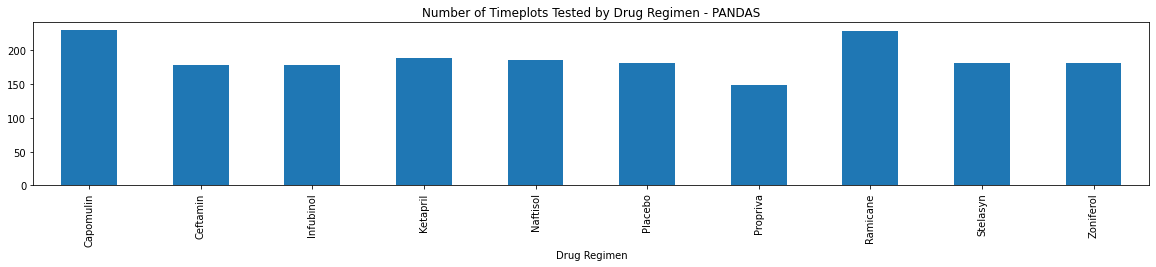

In [19]:
time_plot_count.plot(kind='bar',figsize=(20,3))

plt.title("Number of Timeplots Tested by Drug Regimen - PANDAS")

plt.tight_layout
plt.show()

In [20]:
time_plot_count_df = pd.DataFrame(time_plot_count)
time_plot_count_df

,Timepoint
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,148
Ramicane,228
Stelasyn,181


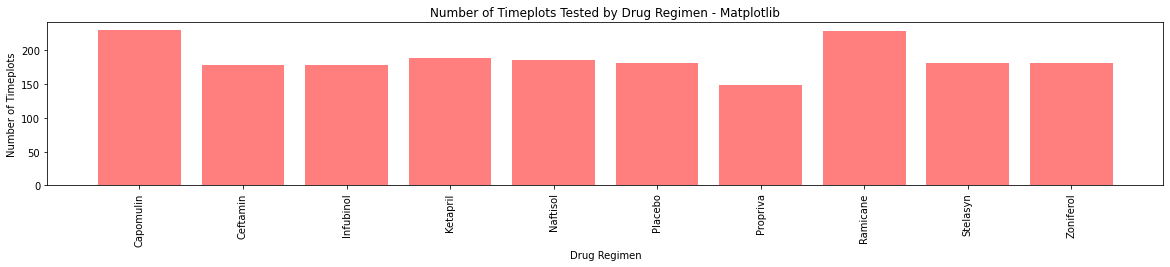

In [21]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
import numpy as np
x_axis = np.arange(0, len(time_plot_count_df))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(20,3))
plt.bar(x_axis, time_plot_count_df["Timepoint"], color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, time_plot_count_df.index, rotation="vertical")

plt.title("Number of Timeplots Tested by Drug Regimen - Matplotlib")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timeplots")

plt.show()


In [22]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# group_by_sex = merge_clean_df.groupby(["Sex","Mouse ID"]).count()
# group_by_sex2_df = group_by_sex.groupby(["Sex"]).count().rename(columns={"Drug Regimen":"Sex"})
# group_by_sex3_df = group_by_sex2_df.loc[:,['Sex']]
# group_by_sex3_df

group_by_sex = merge_clean_df.groupby(["Sex"]).count()
group_by_sex_df = group_by_sex.loc[:,["Mouse ID"]]
group_by_sex_df

,Mouse ID
Sex,
Female,922
Male,958


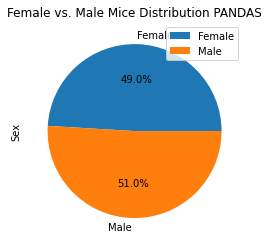

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

male_female_pie = group_by_sex_df.plot(kind = "pie",y="Mouse ID", title = "Female vs. Male Mice Distribution PANDAS", autopct='%1.1f%%')
male_female_pie.set_ylabel("Sex")

plt.tight_layout
plt.show()

Text(0.5, 1.0, 'Female vs. Male Mice Distribution  - Matplotlib')

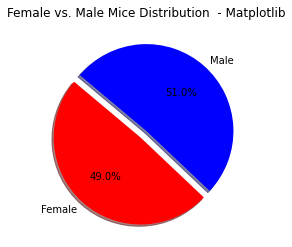

In [24]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
my_labels = group_by_sex_df.index
my_sizes = group_by_sex_df["Mouse ID"]
my_colors = ["red","blue"]
my_explode = (0.1,0)

plt.pie(my_sizes, explode=my_explode, labels=my_labels, colors=my_colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Female vs. Male Mice Distribution  - Matplotlib")

## Quartiles, Outliers and Boxplots

In [25]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

merge_clean_copy = merge_clean_df.copy()
merge_clean_copy

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [26]:

grouped_max = merge_clean_copy.groupby("Mouse ID") #['Timepoint']
grouped_max_df = grouped_max.max()
grouped_max_df


,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
a203,Infubinol,Female,20,23,45,67.973419,2
a251,Infubinol,Female,21,25,45,65.525743,1
a262,Placebo,Female,17,29,45,70.717621,4
a275,Ceftamin,Female,20,28,45,62.999356,3
a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...
z435,Propriva,Female,12,26,10,48.710661,0
z578,Ramicane,Male,11,16,45,45.000000,0
z581,Infubinol,Female,24,25,45,62.754451,3


In [27]:
grouped_max_df["key"] = grouped_max_df.index + grouped_max_df["Timepoint"].astype(str)
grouped_max_df

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,key
Mouse ID,,,,,,,,
a203,Infubinol,Female,20,23,45,67.973419,2,a20345
a251,Infubinol,Female,21,25,45,65.525743,1,a25145
a262,Placebo,Female,17,29,45,70.717621,4,a26245
a275,Ceftamin,Female,20,28,45,62.999356,3,a27545
a366,Stelasyn,Female,16,29,30,63.440686,1,a36630
...,...,...,...,...,...,...,...,...
z435,Propriva,Female,12,26,10,48.710661,0,z43510
z578,Ramicane,Male,11,16,45,45.000000,0,z57845
z581,Infubinol,Female,24,25,45,62.754451,3,z58145


In [28]:
merge_clean_copy["key"] = merge_clean_copy["Mouse ID"] + merge_clean_copy["Timepoint"].astype(str)
merge_clean_copy

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,key
0,k403,Ramicane,Male,21,16,0,45.000000,0,k4030
1,k403,Ramicane,Male,21,16,5,38.825898,0,k4035
2,k403,Ramicane,Male,21,16,10,35.014271,1,k40310
3,k403,Ramicane,Male,21,16,15,34.223992,1,k40315
4,k403,Ramicane,Male,21,16,20,32.997729,1,k40320
...,...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2,z96925
1889,z969,Naftisol,Male,9,30,30,65.841013,3,z96930
1890,z969,Naftisol,Male,9,30,35,69.176246,4,z96935
1891,z969,Naftisol,Male,9,30,40,70.314904,4,z96940


In [29]:
merge_max_df = pd.merge(grouped_max_df, merge_clean_copy, on = "key" , how = "inner")
merge_max_df.head(100)

,Drug Regimen_x,Sex_x,Age_months_x,Weight (g)_x,Timepoint_x,Tumor Volume (mm3)_x,Metastatic Sites_x,key,Mouse ID,Drug Regimen_y,Sex_y,Age_months_y,Weight (g)_y,Timepoint_y,Tumor Volume (mm3)_y,Metastatic Sites_y
0,Infubinol,Female,20,23,45,67.973419,2,a20345,a203,Infubinol,Female,20,23,45,67.973419,2
1,Infubinol,Female,21,25,45,65.525743,1,a25145,a251,Infubinol,Female,21,25,45,65.525743,1
2,Placebo,Female,17,29,45,70.717621,4,a26245,a262,Placebo,Female,17,29,45,70.717621,4
3,Ceftamin,Female,20,28,45,62.999356,3,a27545,a275,Ceftamin,Female,20,28,45,62.999356,3
4,Stelasyn,Female,16,29,30,63.440686,1,a36630,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Ketapril,Male,22,29,45,73.715619,4,k38245,k382,Ketapril,Male,22,29,45,73.715619,4
96,Ramicane,Male,21,16,45,45.000000,1,k40345,k403,Ramicane,Male,21,16,45,22.050126,1
97,Infubinol,Female,20,30,45,66.196912,3,k48345,k483,Infubinol,Female,20,30,45,66.196912,3
98,Stelasyn,Female,8,27,20,52.105574,1,k51020,k510,Stelasyn,Female,8,27,20,52.105574,1


In [30]:
merge_max_2_df = merge_max_df[   ["Mouse ID", 
                                  "Drug Regimen_y",
                                  "Sex_y",
                                  "Age_months_y",
                                  "Weight (g)_y",
                                  "Timepoint_y",
                                  "Tumor Volume (mm3)_y",
                                  "Metastatic Sites_y"] ]

merge_max_2_df = merge_max_2_df.rename(columns={"Drug Regimen_y": "Drug Regimen",
                                              "Sex_y": "Sex",
                                              "Age_months_y": "Age_months",
                                              "Weight (g)_y": "Weight (g)",
                                              "Timepoint_y": "Timepoint",
                                              "Tumor Volume (mm3)_y": "Tumor Volume (mm3)",
                                              "Metastatic Sites_y": "Metastatic Sites"

                                             }
                                    )
merge_max_2_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1


In [31]:
# filter on Capomulin, Ramicane, Infubinol, and Ceftamin
# this FINALLY completes the data frame for the 4 drugs showing the tumor at the last timepoint

merge_max_3_df = merge_max_2_df.loc[ (merge_max_2_df["Drug Regimen"] == "Capomulin") 
                                    | (merge_max_2_df["Drug Regimen"] == "Ramicane")  
                                    | (merge_max_2_df["Drug Regimen"] == "Infubinol")
                                    | (merge_max_2_df["Drug Regimen"] == "Ceftamin"), :
                                   ]

In [32]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = [drug for drug in merge_max_3_df["Drug Regimen"].unique() ]
treatments

['Infubinol', 'Ceftamin', 'Ramicane', 'Capomulin']

In [33]:
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []


In [34]:
i = 0

for treat in treatments:
    j=0
    #print(f"TREATMENT: {treat}")
    tumor_vol.append([])
    
    for drug in merge_max_3_df["Drug Regimen"]:
        #print(f"DRUG: {drug}")
        if treat == drug:
            tumor_vol[i].append(merge_max_3_df.iloc[j,6])
                                
            #print(tumor_vol)
        j+=1                                                                            
    i+=1

# can also use a .loc and do a filter on the drug name on the drug 
# name to simplify this and maybe eliminate the need for an inner loop and index numbers

In [35]:
#tumor_vol

In [36]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 


# Locate the rows which contain mice on each drug and get the tumor volumes

    # add subset 
    
    
    # Determine outliers using upper and lower bounds

In [37]:
# make dataframe from the tumor_vol list so I can use the quantile method.

tumor_drug_df = pd.DataFrame(
            {treatments[0]: tumor_vol[0],
            treatments[1]: tumor_vol[1],
            treatments[2]: tumor_vol[2],
            treatments[3]: tumor_vol[3]
            })

tumor_drug_df.head()


,Infubinol,Ceftamin,Ramicane,Capomulin
0,67.973419,62.999356,38.407618,38.982878
1,65.525743,45.000000,43.047543,38.939633
2,57.031862,56.057749,38.810366,30.485985
3,66.083066,55.742829,32.978522,37.074024
4,72.226731,48.722078,38.342008,40.159220


In [38]:
# solution should have a list of outliers per drug
for x in range(4):
    quartiles = tumor_drug_df.iloc[:,x].quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Tumors in the {treatments[x]} group below {lower_bound} could be outliers.")
    print(f"Tumors in the {treatments[x]} above {upper_bound} could be outliers.")
    outliers_series = tumor_drug_df[f"{treatments[x]}"].loc[ (tumor_drug_df[f"{treatments[x]}"] < lower_bound) | (tumor_drug_df[f"{treatments[x]}"] > upper_bound) ]
    if len(outliers_series.tolist()) == 0:
        print(f"There are no outliers detected in the {treatments[x]} group\n")
    else:
        print(f"The outliers in {treatments[x]} are: {outliers_series.tolist()} \n")


Tumors in the Infubinol group below 36.83290494999999 could be outliers.
Tumors in the Infubinol above 82.74144559000001 could be outliers.
The outliers in Infubinol are: [36.3213458] 

Tumors in the Ceftamin group below 25.355449580000002 could be outliers.
Tumors in the Ceftamin above 87.66645829999999 could be outliers.
There are no outliers detected in the Ceftamin group

Tumors in the Ramicane group below 17.912664470000003 could be outliers.
Tumors in the Ramicane above 54.30681135 could be outliers.
There are no outliers detected in the Ramicane group

Tumors in the Capomulin group below 20.70456164999999 could be outliers.
Tumors in the Capomulin above 51.83201549 could be outliers.
There are no outliers detected in the Capomulin group



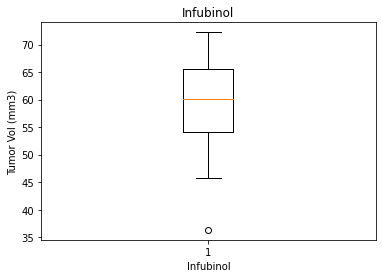

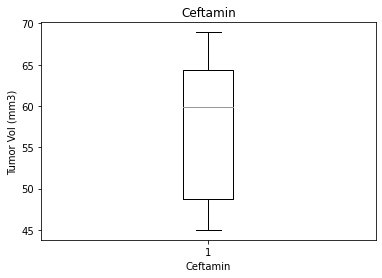

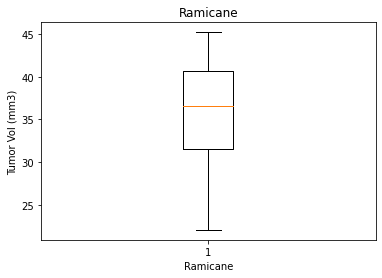

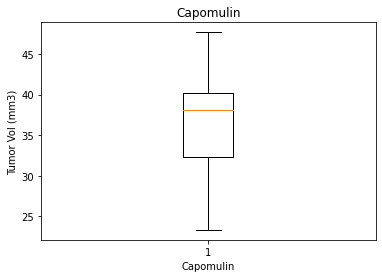

In [39]:

#generate the box plots

i=0

for list in tumor_vol:
    
    fig1,ax1 = plt.subplots()
    ax1.set_title(treatments[i])
    ax1.set_ylabel('Tumor Vol (mm3)')
    ax1.set_xlabel(treatments[i])
    ax1.boxplot(tumor_vol[i])
    plt.show()
    i+=1

## Line and Scatter Plots

In [40]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [41]:
merge_clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [42]:
capomulin_df = merge_clean_df.loc[ merge_clean_df["Drug Regimen"] == "Capomulin",:]    
capomulin_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [43]:
s185_mouse_df = capomulin_df.loc[ capomulin_df["Mouse ID"] == "s185",["Timepoint","Tumor Volume (mm3)"]]


Text(0.5, 1.0, 'Mouse ID s185 Tumor Volume Change using Capomulin')

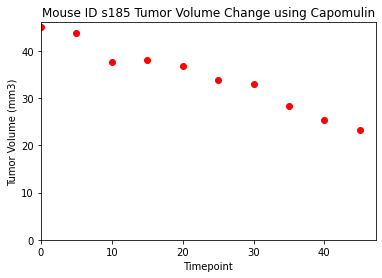

In [44]:
plt.scatter(s185_mouse_df['Timepoint'] ,s185_mouse_df['Tumor Volume (mm3)'],c="red")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.xlim(0)
plt.ylim(0)
plt.title("Mouse ID s185 Tumor Volume Change using Capomulin")

In [45]:
capomulin_weight_df = capomulin_df.groupby(["Weight (g)"]).mean()
capomulin_weight_df

,Age_months,Timepoint,Tumor Volume (mm3),Metastatic Sites
Weight (g),,,,
15,16.000000,22.500000,36.182040,0.000000
17,14.769231,21.538462,37.214133,1.030769
19,7.666667,22.500000,41.182391,0.700000
20,23.000000,22.500000,39.141053,0.600000
21,17.458333,21.666667,42.088700,0.625000
22,15.500000,22.500000,43.288490,0.850000
23,6.478261,20.217391,43.341051,0.521739
24,1.000000,22.500000,44.805810,0.200000
25,14.857143,18.214286,44.062109,0.642857


In [46]:
mouse_weight = capomulin_weight_df.index
avg_tumor_vol = capomulin_weight_df['Tumor Volume (mm3)']

Text(0.5, 1.0, 'Average Tumor vs. Mouse Weight for Capomulin Regimen')

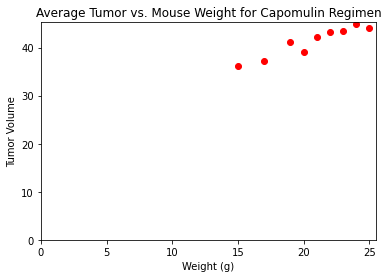

In [47]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

plt.scatter(mouse_weight ,avg_tumor_vol,c="red" )
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume")
plt.xlim(0)
plt.ylim(0)
plt.title("Average Tumor vs. Mouse Weight for Capomulin Regimen")

## Correlation and Regression

In [48]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


In [49]:
print(f"The correlation coefficient between mouse weight and average tumor volume is {round(st.pearsonr(mouse_weight,avg_tumor_vol)[0],2)}")

The correlation coefficient between mouse weight and average tumor volume is 0.95


In [50]:
import scipy.stats as st



SyntaxError: invalid character in identifier (<ipython-input-51-2f40a3f54d48>, line 1)

In [52]:
from scipy import stats
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(mouse_weight, avg_tumor_vol)

In [54]:
vc_fit = vc_slope * mouse_weight + vc_int

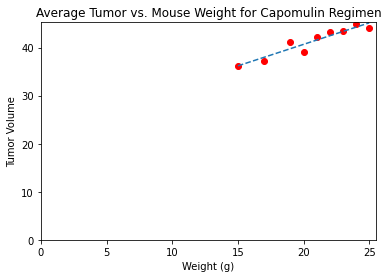

In [56]:
plt.scatter(mouse_weight ,avg_tumor_vol,c="red" )
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume")
plt.xlim(0)
plt.ylim(0)
plt.title("Average Tumor vs. Mouse Weight for Capomulin Regimen")
plt.plot(mouse_weight,vc_fit,"--")